This Notebook handles the implementation of Methods 1-4 for dataset 1

It start with a baseline of the ROUGE scores with no summary performed and the the methods are:

- First k sentences
- Word Frequency
- TextRank
- LSA

Link notebook to google to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


Change directory to the project directory

In [ ]:
cd '/content/drive/My Drive/tfm'

/content/drive/My Drive/tfm


# Read data




drop 52 since it is the headers, it was done in the first notebook but the data was not saved so it has to be repeated

In [ ]:
import pandas as pd 
import numpy as np

df = pd.read_csv('./datasets/kaggle/news_summary_more.csv')
df = df.drop(52)
df = df.reset_index(drop=True)



In [ ]:
df

,headlines,text
0,upGrad learner switches to career in ML & Al w...,"Saurav Kant, an alumnus of upGrad and IIIT-B's..."
1,Delhi techie wins free food from Swiggy for on...,Kunal Shah's credit card bill payment platform...
2,New Zealand end Rohit Sharma-led India's 12-ma...,New Zealand defeated India by 8 wickets in the...
3,Aegon life iTerm insurance plan helps customer...,"With Aegon Life iTerm Insurance plan, customer..."
4,"Have known Hirani for yrs, what if MeToo claim...",Speaking about the sexual harassment allegatio...
...,...,...
98395,CRPF jawan axed to death by Maoists in Chhatti...,A CRPF jawan was on Tuesday axed to death with...
98396,First song from Sonakshi Sinha's 'Noor' titled...,"'Uff Yeh', the first song from the Sonakshi Si..."
98397,'The Matrix' film to get a reboot: Reports,"According to reports, a new version of the 199..."
98398,Snoop Dogg aims gun at clown dressed as Trump ...,A new music video shows rapper Snoop Dogg aimi...


## Initial preprocessing common to all methods

we already check for null inputs then we will subtitute the english contractions to its longer version

In [ ]:
contraction_mapping = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",

                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",

                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",

                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",

                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",

                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",

                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",

                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",

                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",

                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",

                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",

                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",

                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",

                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",

                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",

                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",

                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",

                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",

                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",

                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",

                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",

                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",

                           "you're": "you are", "you've": "you have"}

In [ ]:
for key,val in contraction_mapping.items():
    for i in range(df.shape[0]):
        df.iloc[i][0] = df.iloc[i][0].replace(key, val)
        df.iloc[i][1] = df.iloc[i][1].replace(key, val)

### Split the data:
- First 7000 test
- Next 7000 valid
- Otherwise train

df_train_full are the train and validation splits in one dataframe

In [ ]:
df_train = df.iloc[14000:df.shape[0]]
df_val = df.iloc[7000:14000]
df_train_full = df.iloc[7000:df.shape[0]]
df_test =  df.iloc[0:7000]

Save the preprocessing just done to be able to read and not repeate this step each time the notebook is connected to an instance

In [ ]:
import os
import pickle

os.chdir("/content/drive/My Drive/tfm/datasets/kaggle")


with open("kaggle_train_data.txt", "wb") as fp:   #Pickling
    pickle.dump(df_train, fp)

with open("kaggle_val_data.txt", "wb") as fp:   #Pickling
    pickle.dump(df_val, fp)

with open("kaggle_train_full_data.txt", "wb") as fp:   #Pickling
    pickle.dump(df_train_full,fp)

with open("kaggle_test_data.txt", "wb") as fp:   #Pickling
    pickle.dump(df_test, fp)

# Read the preprocessed data

In [ ]:
import pandas as pd
df_train_full = pd.read_pickle('./datasets/kaggle/kaggle_train_full_data.txt')
df_test = pd.read_pickle('./datasets/kaggle/kaggle_test_data.txt')

# Install ROUGE to calculate the F1 ROUGE scores

In [ ]:
!pip install rouge

# Method 0: No summary

calculate the ROUGE scores for the original text and the provied summary

In [ ]:
df = df_test
from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 =[]
hist_l =[]
for i in range(0,df.shape[0]):
    if (i%40000==0):
        print(i)
    scores1 = rouge.get_scores(df.iloc[i,1],df.iloc[i,0],)
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=df.shape[0]
rouge_2/=df.shape[0]
rouge_l/=df.shape[0]

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

0
Rouge-1:
 	 mean: 0.1854 
 	 Confidence interval: 90 %  [0.090 , 0.274]
Rouge-2:
 	 mean: 0.0724 
 	 Confidence interval: 90 %  [0.000 , 0.171]
Rouge-l:
 	 mean: 0.1925 
 	 Confidence interval: 90 %  [0.092 , 0.305]


Histogram of the results

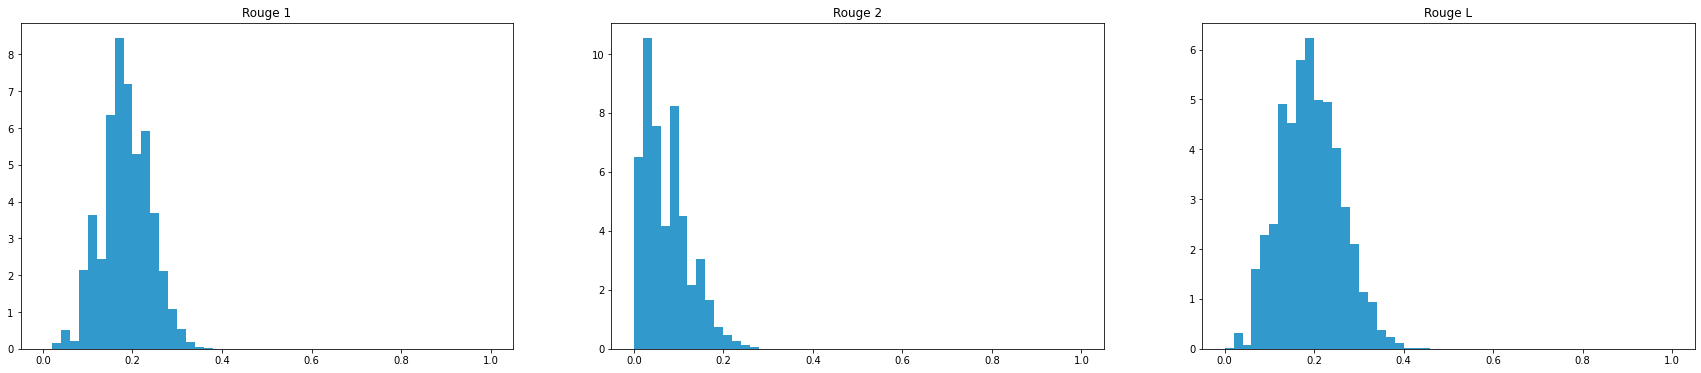

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

# Method 1: First K Sentences

## Hypper parameter tunning

Select the first k sentences as a summary, first we need to selec the best value of k

The train_full dataframe would be use for this purpose

### 1 sentence

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = df_train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,len(df)):
    if(i%20000==0):print(i)
    # separate the sentences
    temp = sent_tokenize(df.iloc[i,1])
    temp = temp[0]
   
    scores1 = rouge.get_scores(temp,df.iloc[i,0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=len(df)
rouge_2/=len(df)
rouge_l/=len(df)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0
20000
40000
60000
80000
rouge-1:  0.31608952487777564
rouge-2:  0.12863160596661644
rouge-l:  0.2868667515919284


### 2 Sentences

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = df_train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,len(df)):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df.iloc[i,1])
    if (len(temp)>=2):
        temp = temp[0] + temp[1]
    else:
        temp = temp[0]
   
    scores1 = rouge.get_scores(temp,df.iloc[i,0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=len(df)
rouge_2/=len(df)
rouge_l/=len(df)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0
20000
40000
60000
80000
rouge-1:  0.2176941216211529
rouge-2:  0.08431365572042636
rouge-l:  0.2169087148553319


### 3 sentences

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = df_train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,len(df)):
    if(i%20000==0):print(i)
    temp = sent_tokenize(df.iloc[i,1])
    if (len(temp)>=3):
        temp = temp[0]+ temp[1] + temp[2]
    else:
        if (len(temp)>=2):
            temp = temp[0] + temp[1]
        else:
            temp = temp[0]
   
    scores1 = rouge.get_scores(temp,df.iloc[i,0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=len(df)
rouge_2/=len(df)
rouge_l/=len(df)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0
20000
40000
60000
80000
rouge-1:  0.17958230904526876
rouge-2:  0.06786908771158125
rouge-l:  0.18846733678233593


## Test

1 sentences are the best value for the k parameter

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize, sent_tokenize
from rouge import Rouge

df = df_test
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,len(df)):
    if(i%20000==0):print(i)
    # separate the sentences
    temp = sent_tokenize(df.iloc[i,1])
    temp = temp[0]
   
    scores1 = rouge.get_scores(temp,df.iloc[i,0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=len(df)
rouge_2/=len(df)
rouge_l/=len(df)

import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
0
Rouge-1:
 	 mean: 0.3215 
 	 Confidence interval: 90 %  [0.125 , 0.538]
Rouge-2:
 	 mean: 0.1332 
 	 Confidence interval: 90 %  [0.000 , 0.345]
Rouge-l:
 	 mean: 0.2847 
 	 Confidence interval: 90 %  [0.098 , 0.519]


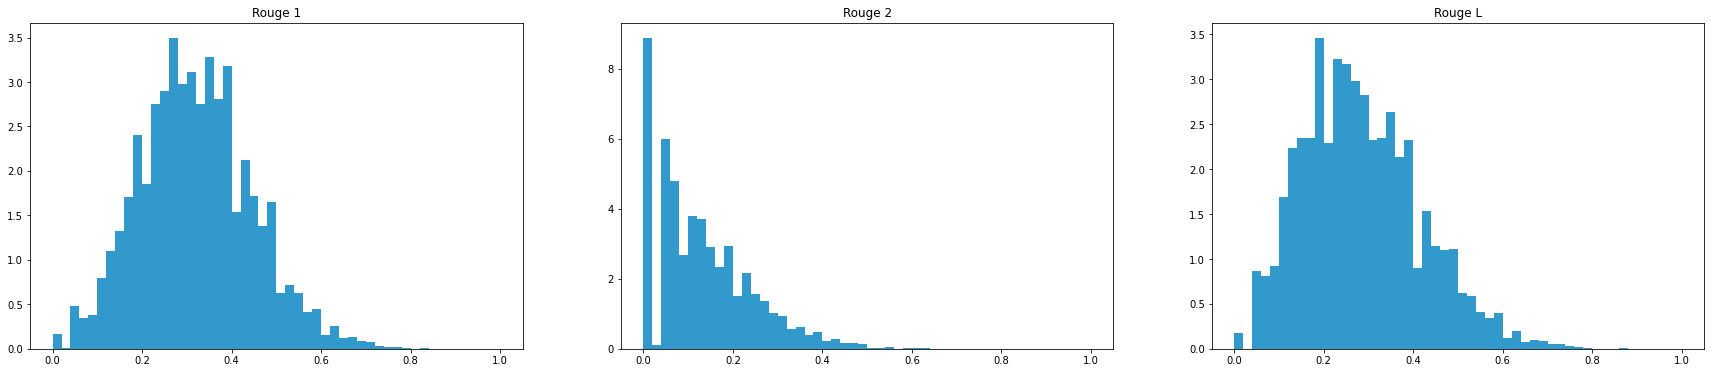

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

# Method 2: Word Frequency 

Adaption of the code from https://becominghuman.ai/text-summarization-in-5-steps-using-nltk-65b21e352b65

Remove the stop words, then score the words, then scores the sentences according to its scores, select a threshold value and select the sentences with score above the threshold

## Implementation

*nltk* for preprocessing

In [ ]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
# create frequency table
def _create_frequency_table(text_string) -> dict:


    stopWords = set(stopwords.words("english"))
    words = word_tokenize(text_string)
    ps = PorterStemmer()

    freqTable = dict()
    for word in words:
        word = ps.stem(word)
        if word in stopWords:
            continue
        if word in freqTable:
            freqTable[word] += 1
        else:
            freqTable[word] = 1

    return freqTable

# Score the sentences: Term frequency

def _score_sentences(sentences, freqTable,char1) -> dict:
    sentenceValue = dict()

    for sentence in sentences:
        word_count_in_sentence = (len(word_tokenize(sentence)))
        for wordValue in freqTable:
            if wordValue in sentence.lower():
                if sentence[:char1] in sentenceValue:
                    sentenceValue[sentence[:char1]] += freqTable[wordValue]
                else:
                    sentenceValue[sentence[:char1]] = freqTable[wordValue]

        sentenceValue[sentence[:char1]] = sentenceValue[sentence[:char1]] / word_count_in_sentence

    return sentenceValue

# Find the htreshold score
def _find_average_score(sentenceValue) -> int:
    sumValues = 0
    c = 0
    for entry in sentenceValue:
        sumValues += sentenceValue[entry]

    # Average value of a sentence from original text
    average = int(sumValues / len(sentenceValue))

        # print("sentence value =", len(sentenceValue))
        # print("sumValues = ",sumValues)
    return average

#Generate summary

def _generate_summary(sentences, sentenceValue, threshold):
    sentence_count = 0
    summary = ''

    for sentence in sentences:
        if sentence[:10] in sentenceValue and sentenceValue[sentence[:10]] > (threshold):
            summary += " " + sentence
            sentence_count += 1

    return summary

## Hyperparameter tuning since no training is requieres train_full = train + validation splits

using df_train_full which is df_train and df_val in one dataset

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
c1=0

df = df_train_full
final =[]
# testing tuning the threashold value by x * threshold
for j in [0,0.5,0.9,1,1.1,1.5,2]:
    print(j)
    generated_summaries =[]
    for i in range(0,df.shape[0]):
        text = df.iloc[i,1]
        # 1 Create the word frequency table
        freq_table = _create_frequency_table(text)
        '''
        We already have a sentence tokenizer, so we just need 
        to run the sent_tokenize() method to create the array of sentences.
        '''
        # 2 Tokenize the sentences
        sentences = sent_tokenize(text)
        # 3 Important Algorithm: score the sentences
        sentence_scores = _score_sentences(sentences, freq_table,10)   
        # 4 Find the threshold
        threshold = _find_average_score(sentence_scores)
        # 5 Important Algorithm: Generate the summary
        summary = _generate_summary(sentences, sentence_scores, j * threshold)
        # just in case no summary was generated
        if(len(summary)<1):
            summary = _generate_summary(sentences, sentence_scores, 0.99 * threshold)

        generated_summaries.append(summary)
    final.append(generated_summaries)
    

In [ ]:
from rouge import Rouge

final_scores=[]
for x in range(len(final)):
    rouge = Rouge()
    rouge_1 = 0
    rouge_2 = 0
    rouge_l = 0

    for i in range(0,len(final[x])):
        if (i%40000==0):
            print(i)
        scores1 = rouge.get_scores(final[x][i],df.iloc[i,0])
        rouge_1 +=float(scores1[0]['rouge-1']['f'])
        rouge_2 +=float(scores1[0]['rouge-2']['f'])
        rouge_l +=float(scores1[0]['rouge-l']['f'])
        
    rouge_1/=len(generated_summaries)
    rouge_2/=len(generated_summaries)
    rouge_l/=len(generated_summaries)

    final_scores.append([rouge_1,rouge_2,rouge_l])


In [ ]:
final_scores # [0,0.5,0.9,1,1.1,1.5,2] 

[[0.17609212821907572, 0.06629118963205734, 0.18625075060184607],
 [0.17611139327553213, 0.0662989074441155, 0.1862682941234971],
 [0.17890246857678455, 0.06689260778607387, 0.18750582003642674],
 [0.17922447026635996, 0.06516844080868968, 0.18465703917146445],
 [0.17713386903897368, 0.06307563550996009, 0.180732300143738],
 [0.1776672964487705, 0.06448028497084962, 0.1833190712926944],
 [0.1787602490581737, 0.06562923938358192, 0.18542500240100532]]

## Test Word frequency

the original threshold values looks have the biggest score

In [ ]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize, sent_tokenize
c1=0
df = df_test
generated_summaries =[]
for i in range(0,df.shape[0]):
    text = df.iloc[i,1]
    # 1 Create the word frequency table
    freq_table = _create_frequency_table(text)
    '''
    We already have a sentence tokenizer, so we just need 
    to run the sent_tokenize() method to create the array of sentences.
    '''
    # 2 Tokenize the sentences
    sentences = sent_tokenize(text)
    # 3 Important Algorithm: score the sentences
    sentence_scores = _score_sentences(sentences, freq_table,10)   
    # 4 Find the threshold
    threshold = _find_average_score(sentence_scores)
    # 5 Important Algorithm: Generate the summary
    summary = _generate_summary(sentences, sentence_scores, 1 * threshold)
    
    if(len(summary)<1):
        summary = _generate_summary(sentences, sentence_scores, 0.9 * threshold)

    generated_summaries.append(summary)
    
from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 =[]
hist_l =[]
for i in range(0,len(generated_summaries)):
    if (i%40000==0):
        print(i)
    scores1 = rouge.get_scores(generated_summaries[i],df.iloc[i,0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) 
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

Rouge-1:
 	 mean: 0.1868 
 	 Confidence interval: 90 %  [0.056 , 0.320]
Rouge-2:
 	 mean: 0.0703 
 	 Confidence interval: 90 %  [0.000 , 0.189]
Rouge-l:
 	 mean: 0.1892 
 	 Confidence interval: 90 %  [0.056 , 0.340]


Histograms of the results

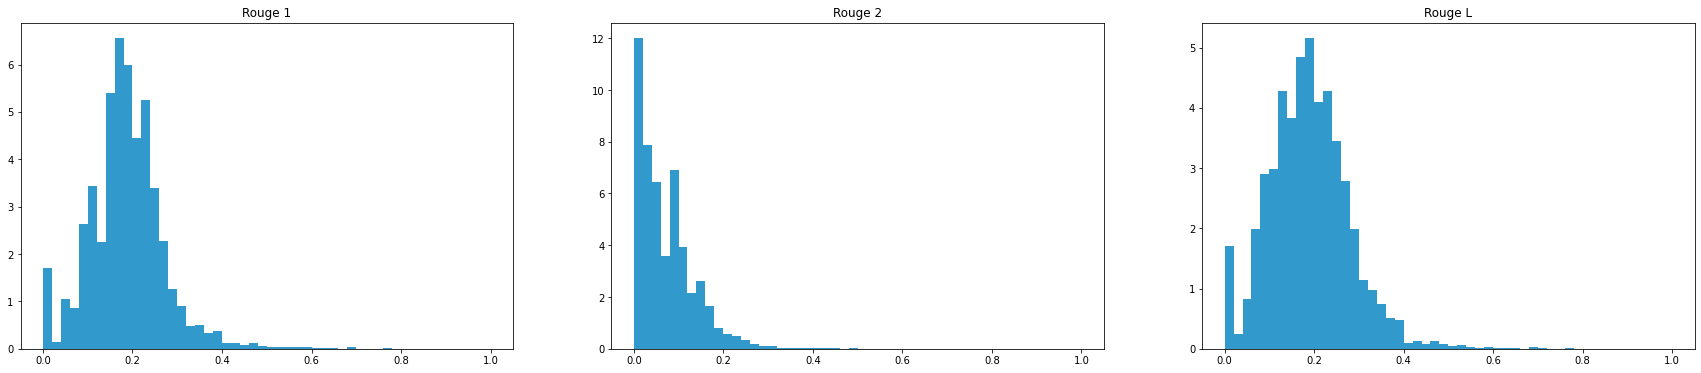

In [ ]:
import matplotlib.pyplot as plt
import scipy.stats as st

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")

_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC") # skyblue6
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

# PyTLDR

For the next 2 methods we will use the python library PyTLDR: https://pypi.org/project/PyTLDR/

To ensure that is compatible with python 3 we will download the code from github

In [ ]:
!git clone https://github.com/vinodnimbalkar/PyTLDR.git4
# Download only 1 time and save it to drive

Cloning into 'PyTLDR'...
remote: Enumerating objects: 267, done.
remote: Total 267 (delta 0), reused 0 (delta 0), pack-reused 267
Receiving objects: 100% (267/267), 73.85 KiB | 1.54 MiB/s, done.
Resolving deltas: 100% (135/135), done.


Go to the code directory

In [ ]:
cd /content/drive/My Drive/tfm/PyTLDR/

/content/drive/My Drive/tfm/PyTLDR


Install it

In [ ]:
!python setup.py install

# Method 3: TextRank

Transform the text to a graph and use PageRank to select the sentences

## Hyperparameter tuning

We are tunning the parameter length it can be percentage of summary (number from 0 to 1) or number of sentences (integer)

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = df_train_full
generated_summaries =[]
for i in range (0,df.shape[0]):
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df.iloc[i,1], length=0.3)
    # just in case no summary is generated
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.4)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.5)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.6)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.7)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.8)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.9)
    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=' '+sum[x]
    generated_summaries.append(sum2)

# Calculation of ROUGE scores
from rouge import Rouge
df = df_train_full
rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df.iloc[i,1]
    scores1 = rouge.get_scores(temp,df.iloc[i,0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)


0
20000
40000
60000
80000
0
20000
40000
60000
80000
rouge-1:  0.2489364232436553
rouge-2:  0.09155067634069954
rouge-l:  0.22562651154734595


In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = df_train_full
generated_summaries =[]
for i in range (0,df.shape[0]):
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df.iloc[i,1], length=1)
    
    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge
df = df_train_full
rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df.iloc[i,1]
    scores1 = rouge.get_scores(temp,df.iloc[i,0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)


0
20000
40000
60000
80000
0
20000
40000
60000
80000
rouge-1:  0.2489414349312441
rouge-2:  0.09155401939927128
rouge-l:  0.22562953317923498


In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = df_train_full
generated_summaries =[]
for i in range (0,df.shape[0]):
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df.iloc[i,1], length=2)
    
    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=' '+sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge
df = df_train_full
rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df.iloc[i,1]
    scores1 = rouge.get_scores(temp,df.iloc[i,0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)


0
20000
40000
60000
80000
0
20000
40000
60000
80000
rouge-1:  0.20406049620806355
rouge-2:  0.07677981538812825
rouge-l:  0.20412854203090788


In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = df_train_full
generated_summaries =[]
for i in range (0,df.shape[0]):
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df.iloc[i,1], length=0.5)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.6)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.7)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.8)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.9)
    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=' '+sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge
df = df_train_full
rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df.iloc[i,1]
    scores1 = rouge.get_scores(temp,df.iloc[i,0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)


0
20000
40000
60000
80000
0
20000
40000
60000
80000
rouge-1:  0.21676422552832197
rouge-2:  0.07966248068284912
rouge-l:  0.20729361145076694


In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

# If you don't specify a tokenizer when intiializing a summarizer then the
# English tokenizer will be used by default
summarizer = TextRankSummarizer()  # English tokenizer used

# This object creates a summary using the summarize method:
# e.g. summarizer.summarize(text, length=5, weighting='frequency', norm=None)

# The length parameter specifies the length of the summary, either as a
# number of sentences, or a percentage of the original text

# The summarizer can take as input...
# 1. A string:

df = df_train_full
generated_summaries =[]
for i in range (0,df.shape[0]):
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df.iloc[i,1], length=0.1)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.2)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.3)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.4)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.5)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.6)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.7)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.8)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.9)
    #if(len(sum)< 4): print(i)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=' '+sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge
df = df_train_full
rouge_1= 0
rouge_2= 0
rouge_l= 0
rouge = Rouge()
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df.iloc[i,1]
    scores1 = rouge.get_scores(temp,df.iloc[i,0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)


0
20000
40000
60000
80000
0
20000
40000
60000
80000
rouge-1:  0.2489414349312441
rouge-2:  0.09155401939927128
rouge-l:  0.22562953317923498


## test text rank

best value is 0.1 for length

In [ ]:
from pytldr.summarize import TextRankSummarizer
from pytldr.nlp import Tokenizer

tokenizer = Tokenizer('english')
summarizer = TextRankSummarizer(tokenizer)

df = df_test
# let's begin
generated_summaries = []
for i in range(0,df.shape[0]):
    if(i%2000==0):print(i)
    sum = summarizer.summarize(df.iloc[i,1], length=0.1)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.2)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.3)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.4)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.5)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.6)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.7)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.8)
    if(len(sum)<1): sum = summarizer.summarize(df.iloc[i,1], length=0.9)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=' '+sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,len(generated_summaries)):
    if(i%20000==0):print(i)
    temp = generated_summaries[i]
    if (len(temp)==0):temp = df.iloc[i,1]
    scores1 = rouge.get_scores(temp,df.iloc[i,0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
2000
4000
6000
0
rouge-1:  0.2586330855930687
rouge-2:  0.09775123120274512
rouge-l:  0.2289189160294338


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

Rouge-1:
 	 mean: 0.2586 
 	 Confidence interval: 90 %  [0.000 , 0.488]
Rouge-2:
 	 mean: 0.0978 
 	 Confidence interval: 90 %  [0.000 , 0.300]
Rouge-l:
 	 mean: 0.2289 
 	 Confidence interval: 90 %  [0.000 , 0.474]


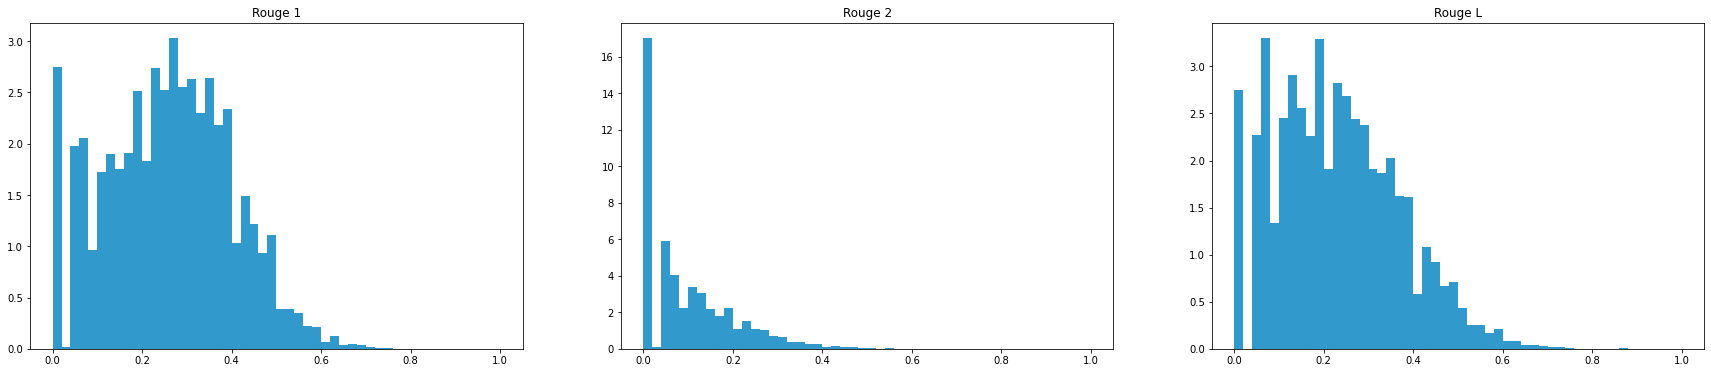

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")

 # Method 4: LSA

Using Latent Semantic Analysis to selecte the sentences of a summary

## Hyperparameter tuning

Length and topics are the parameters for tunning 

In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
#summarizer = LsaSteinberger()
summarizer = LsaSummarizer()  # This is identical to the LsaOzsoy object

# summary = summarizer.summarize(
#     text, topics=4, length=5, binary_matrix=True, topic_sigma_threshold=0.5
# )

# topics specifies the number of topics to cluster the article into.
# topic_sigma_threshold removes all topics with a singular value less than a given
# percentage of the largest singular value.

df = df_train_full
generated_summaries =[]
for i in range (0,df.shape[0]):

    if (i %20000==0):print(i)
    sum = summarizer.summarize(df.iloc[i,1],length=1)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=' '+sum[x]
    generated_summaries.append(sum2)


In [ ]:
from rouge import Rouge # lsa length 1
df = df_train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df.iloc[i,1]
    scores1 = rouge.get_scores(temp,df.iloc[i,0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0
20000
40000
60000
80000
rouge-1:  0.20214810421804674
rouge-2:  0.06712160383830693
rouge-l:  0.1827925574731306


In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
summarizer = LsaSteinberger()
df = df_train_full
generated_summaries =[]
for i in range (0,df.shape[0]):
    #print(i)
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df.iloc[i,1], topics=16,binary_matrix=True, length=1)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge
df = df_train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df.iloc[i,1]
    scores1 = rouge.get_scores(temp,df.iloc[i,0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0


/content/drive/My Drive/tfm/PyTLDR/pytldr/summarize/lsa.py:36: Warning: The parameter "topics" must be <= rank(sentence_matrix) - 1 to avoid rank deficiency in the SVD computation. The number of topics has been adjusted to equal rank(sentence_matrix) - 1 but this could result in a poor summary.
  Warning


20000
40000
60000
80000
0
20000
40000
60000
80000
rouge-1:  0.25119153041063
rouge-2:  0.09194999889419904
rouge-l:  0.226800970711353


In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
summarizer = LsaSteinberger()
df = df_train_full
generated_summaries =[]
for i in range (0,df.shape[0]):
    #print(i)
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df.iloc[i,1], topics=16,binary_matrix=True, length=2)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge
df = df_train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df.iloc[i,1]
    scores1 = rouge.get_scores(temp,df.iloc[i,0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0


/content/drive/My Drive/tfm/PyTLDR/pytldr/summarize/lsa.py:36: Warning: The parameter "topics" must be <= rank(sentence_matrix) - 1 to avoid rank deficiency in the SVD computation. The number of topics has been adjusted to equal rank(sentence_matrix) - 1 but this could result in a poor summary.
  Warning


20000
40000
60000
80000
0
20000
40000
60000
80000
rouge-1:  0.2052457913693578
rouge-2:  0.0771259757010732
rouge-l:  0.20450949982982436


In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
summarizer = LsaSteinberger()
df = df_train_full
generated_summaries =[]
for i in range (0,df.shape[0]):
    #print(i)
    if (i %20000==0):print(i)
    sum = summarizer.summarize(df.iloc[i,1], topics=8,binary_matrix=True, length=2)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_summaries.append(sum2)

from rouge import Rouge
df = df_train_full
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
final_scores=[]
for i in range(0,len(generated_summaries)):
    if (i %20000==0):print(i)

    temp = generated_summaries[i]
    if (len(temp)==0):temp = df.iloc[i,1]
    scores1 = rouge.get_scores(temp,df.iloc[i,0])
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
        
rouge_1/=len(generated_summaries)
rouge_2/=len(generated_summaries)
rouge_l/=len(generated_summaries)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

0


/content/drive/My Drive/tfm/PyTLDR/pytldr/summarize/lsa.py:36: Warning: The parameter "topics" must be <= rank(sentence_matrix) - 1 to avoid rank deficiency in the SVD computation. The number of topics has been adjusted to equal rank(sentence_matrix) - 1 but this could result in a poor summary.
  Warning


20000
40000
60000
80000
0
20000
40000
60000
80000
rouge-1:  0.2052661274052752
rouge-2:  0.07714114023141211
rouge-l:  0.20452085777206153


## Test LSA

In [ ]:
from pytldr.summarize import LsaSummarizer, LsaOzsoy, LsaSteinberger

#summarizer = LsaOzsoy()
summarizer = LsaSteinberger()

df = df_test
# let's begin
generated_sum = []
for i in range(0,df.shape[0]):
    if(i%20000==0):print(i)
    sum = summarizer.summarize(df.iloc[i,1], topics=16,binary_matrix=True, length=1)
    sum2 = ''
    for x in range(len(sum)):
        sum2 +=sum[x]
    generated_sum.append(sum2)

from rouge import Rouge
rouge = Rouge()
rouge_1= 0
rouge_2= 0
rouge_l= 0
hist_1 = []
hist_2 = []
hist_l = []
for i in range(0,len(generated_sum)):
    if(i%20000==0):print(i)
    temp = generated_sum[i]
    if (len(temp)==0):temp = df.iloc[i,1]
    scores1 = rouge.get_scores(temp,df.iloc[i,0])
    hist_1.append(float(scores1[0]['rouge-1']['f']))
    hist_2.append(float(scores1[0]['rouge-2']['f']))
    hist_l.append(float(scores1[0]['rouge-l']['f']))
    rouge_1+=float(scores1[0]['rouge-1']['f'])
    rouge_2+=float(scores1[0]['rouge-2']['f'])
    rouge_l+=float(scores1[0]['rouge-l']['f'])
    
rouge_1/=len(generated_sum)
rouge_2/=len(generated_sum)
rouge_l/=len(generated_sum)

print("rouge-1: ",rouge_1) # generated summary 0.2
print("rouge-2: ",rouge_2)
print("rouge-l: ",rouge_l)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def get_conf_int(hist,alpha):
    # confidence intervals
    p = ((1.0-alpha)/2.0) * 100
    lower = max(0.0, np.percentile(hist, p))
    p = (alpha+((1.0-alpha)/2.0)) * 100
    upper = min(1.0, np.percentile(hist, p))
    return lower,upper


alpha = 0.9
lower1,upper1 = get_conf_int(hist_1,alpha)
lower2,upper2 = get_conf_int(hist_2,alpha)
lower3,upper3 = get_conf_int(hist_l,alpha)

print('Rouge-1:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_1,alpha*100, lower1, upper1))
print('Rouge-2:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_2,alpha*100, lower2, upper2))
print('Rouge-l:\n \t mean: %.4f \n \t Confidence interval: %d %%  [%.3f , %.3f]' % (rouge_l,alpha*100, lower3, upper3))

Rouge-1:
 	 mean: 0.2638 
 	 Confidence interval: 90 %  [0.050 , 0.485]
Rouge-2:
 	 mean: 0.1002 
 	 Confidence interval: 90 %  [0.000 , 0.296]
Rouge-l:
 	 mean: 0.2322 
 	 Confidence interval: 90 %  [0.050 , 0.471]


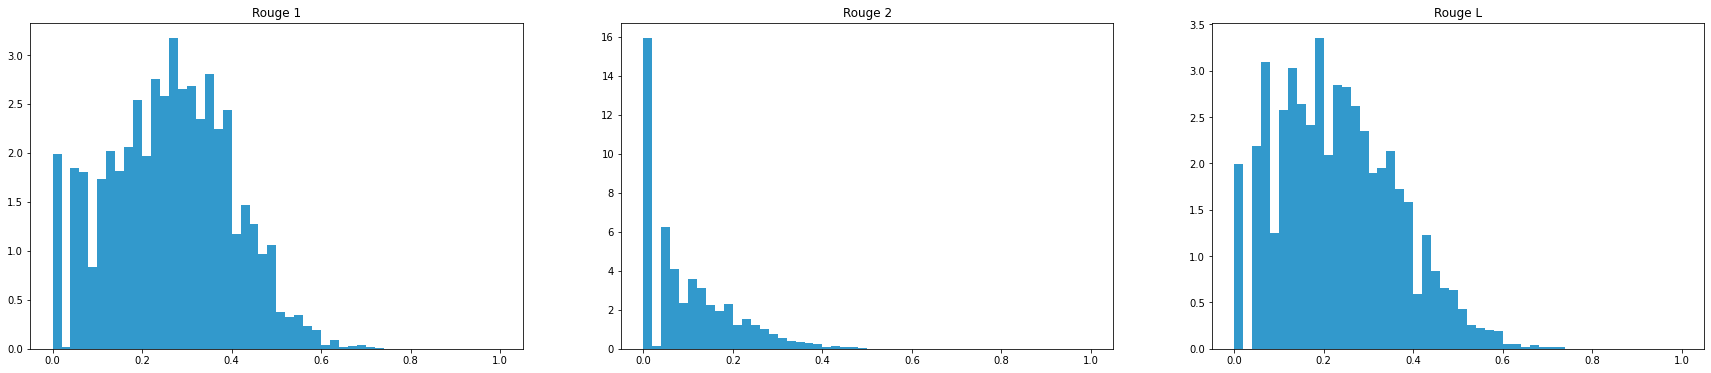

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2,ax3) = plt.subplots(1, 3,figsize=(30,6))
ax1.set_title("Rouge 1")
ax2.set_title("Rouge 2")
ax3.set_title("Rouge L")
_ = ax1.hist(hist_1,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax2.hist(hist_2,bins=50,range=(0,1),density=True,color="#3299CC")
_ = ax3.hist(hist_l,bins=50,range=(0,1),density=True,color="#3299CC")